# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [2]:
# Use this cell to begin, and add as many cells as you need to complete your analy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score


df = pd.read_csv("data/toyota.csv")

In [3]:
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
df.info()
#no missing values. It's clean data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
df.describe() 
#mpg and engine size both have big jumps from 75% to max I need to look at these

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [6]:
df.dtypes


model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [7]:
for c in df.columns:
    print(df[c].value_counts().sort_index())
# model, Transmission and fuel type seem categorical

 Auris             712
 Avensis           115
 Aygo             1961
 C-HR              479
 Camry              11
 Corolla           267
 GT86               73
 Hilux              86
 IQ                  8
 Land Cruiser       51
 PROACE VERSO       15
 Prius             232
 RAV4              473
 Supra              12
 Urban Cruiser       4
 Verso             114
 Verso-S             3
 Yaris            2122
Name: model, dtype: int64
1998       1
1999       1
2000       1
2001       1
2002       4
2003       6
2004       7
2005      12
2006      11
2007      20
2008      19
2009      29
2010      18
2011      40
2012      42
2013     204
2014     352
2015     525
2016     997
2017    2019
2018    1015
2019    1286
2020     128
Name: year, dtype: int64
850      1
899      1
950      1
975      1
1200     1
        ..
52291    1
52990    1
54550    1
54991    1
59995    1
Name: price, Length: 2114, dtype: int64
Automatic    2657
Manual       3826
Other           1
Semi-Auto     254
Nam

In [8]:
df[df['transmission']=='Other']
# can't filter by model for some reason and so just dropping this one as it's the only one with transmission 'other'

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2458,Yaris,2015,12795,Other,16733,Hybrid,0,78.0,1.5


In [9]:
df.drop(index = 2458, inplace = True)




In [10]:
df[df['transmission']=='Other']
df.shape
#check it's gone

(6737, 9)

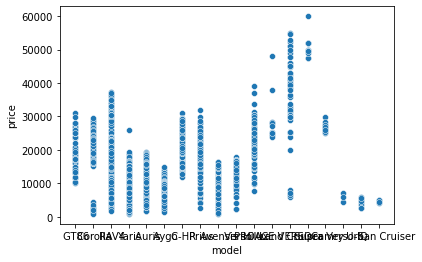

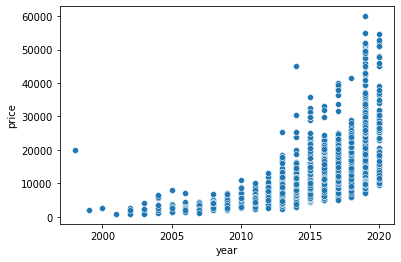

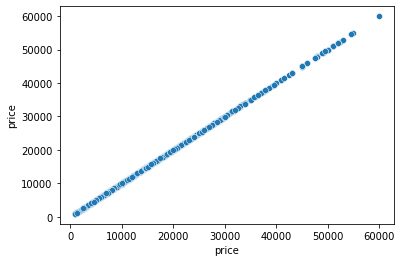

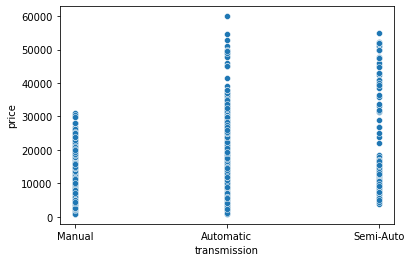

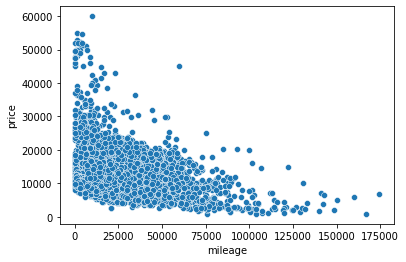

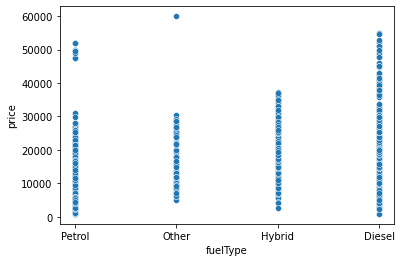

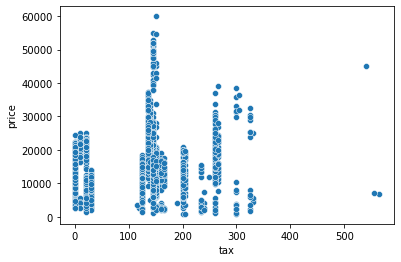

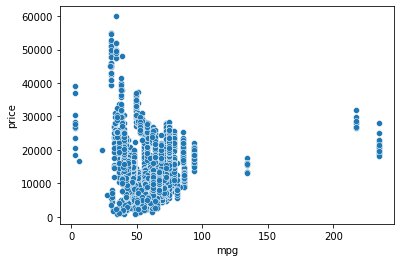

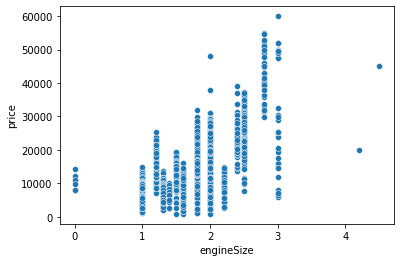

In [11]:
for c in df.columns:
    _=sns.scatterplot(x = df[c], y=df['price'])
    plt.show()
# there are two mileage outliers and probably a classic car in price vs year. I'll drop the classic car from 1998 year 
# to avoid the outlier, but leave the two mileage outliers in the study

In [12]:
df[df['year'] == 1998]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6694,Land Cruiser,1998,19990,Manual,100000,Diesel,265,23.9,4.2


In [13]:
df.drop(index = 6694, inplace = True)


In [14]:
df.shape

(6736, 9)

In [15]:
df_with_cat = pd.get_dummies(df)
#one hot encode all the categorical data

In [16]:
df_with_cat.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,18998,14736,150,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2017,17498,36284,145,36.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
#use linear regression to make a pricing prediction model. Split the dependent and independent variables
y = df_with_cat['price']
X = df_with_cat.drop('price', axis=1)


In [18]:
print(f'df_with_cat.shape: {df_with_cat.shape}, X.shape: {X.shape}, y.shape:{y.shape}')
y.shape

df_with_cat.shape: (6736, 31), X.shape: (6736, 30), y.shape:(6736,)


(6736,)

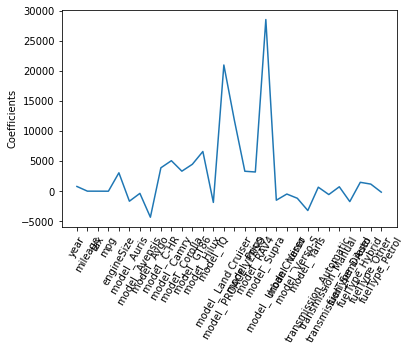

In [19]:
#check for big coefficients to avoid overfit
names = X.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
#the car model type matters most in price, and this is not surprising

In [20]:
#I'm going to run a multivariate linear regression to get a formula to predict price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

In [21]:
y_test.shape, y_train.shape, y.shape

((2021,), (4715,), (6736,))

In [22]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)
#R-squared is very good for the test fit

0.9279572032363838

In [23]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1679.1328333260155


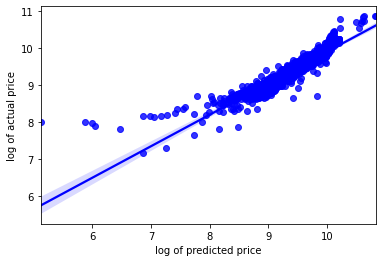

In [24]:
_=sns.regplot(x=np.log(y_pred), y= np.log(y_test), color = 'b')
plt.xlabel('log of predicted price'), plt.ylabel('log of actual price')
plt.show()

In [25]:
coefficients = pd.DataFrame(reg_all.coef_, X.columns, columns=['Coefficients']).reset_index()
coefficients.to_csv('out')
print(coefficients)

                     index  Coefficients
0                     year    781.719120
1                  mileage     -0.063157
2                      tax     -3.779737
3                      mpg     -6.446747
4               engineSize   2895.071491
5             model_ Auris  -5789.368227
6           model_ Avensis  -4641.530564
7              model_ Aygo  -8606.806424
8              model_ C-HR   -313.860896
9             model_ Camry   1303.048003
10          model_ Corolla   -792.382902
11             model_ GT86    562.988892
12            model_ Hilux   2840.746260
13               model_ IQ  -6401.889341
14     model_ Land Cruiser  16612.443922
15     model_ PROACE VERSO   5612.748563
16            model_ Prius   -876.087567
17             model_ RAV4   -747.148120
18            model_ Supra  24500.961348
19    model_ Urban Cruiser  -5680.892803
20            model_ Verso  -4628.898256
21          model_ Verso-S  -5562.060515
22            model_ Yaris  -7392.011375
23  transmission

In [26]:
new = coefficients.reset_index()
new[new['index'].str.contains('model_')].sort_values(by=['Coefficients'])


,level_0,index,Coefficients
7,7,model_ Aygo,-8606.806424
22,22,model_ Yaris,-7392.011375
13,13,model_ IQ,-6401.889341
5,5,model_ Auris,-5789.368227
19,19,model_ Urban Cruiser,-5680.892803
21,21,model_ Verso-S,-5562.060515
6,6,model_ Avensis,-4641.530564
20,20,model_ Verso,-4628.898256
16,16,model_ Prius,-876.087567
10,10,model_ Corolla,-792.382902


In [27]:


lasso = Lasso(alpha=0.9, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)
#even a huge alpha didn't really impact the coefficients so I think they are robust and not overfit

0.921753284905928

In [28]:
coefficients = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficients'])
print(coefficients)

                        Coefficients
year                      746.019041
mileage                    -0.062434
tax                        -1.565004
mpg                        -2.036043
engineSize               5040.536726
model_ Auris              -50.029060
model_ Avensis             -0.000000
model_ Aygo             -1812.472120
model_ C-HR              5059.296627
model_ Camry             3691.519366
model_ Corolla           4405.103401
model_ GT86              4419.915266
model_ Hilux             4454.147261
model_ IQ                   0.000000
model_ Land Cruiser     17296.354319
model_ PROACE VERSO      7411.705398
model_ Prius             4177.881548
model_ RAV4              2740.822947
model_ Supra            25614.052707
model_ Urban Cruiser       -0.000000
model_ Verso                0.000000
model_ Verso-S              0.000000
model_ Yaris            -1406.416085
transmission_Automatic      0.000000
transmission_Manual     -1353.895742
transmission_Semi-Auto      0.000000
f

In [29]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1679.1328333260155


In [30]:

reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=10)
print(cv_results, np.mean(cv_results))
#not as good, but still going with the regression results

[0.78775763 0.89230543 0.82901356 0.68868629 0.81079447 0.90344004
 0.67009239 0.54969108 0.91261943 0.35537419] 0.739977449524217


The pricing method may look imposing, btu there is nothing to worry about!

The pricing method is a combination of factors that allows anyone using any spreadsheet or even a calculator and pen and paper to input the values and arrive at a fair price.


Please note that the year is the number of years since 1999, which is the earliest model in the data

For example:
A 2016 GT86 with manual transmission, 24.089 miles, burning Petrol, with tax of 265, mpg of 36.2 and 2.0 liter engine would price as:

781 * 17 + 562     -    816          -            24.089 * .063 – 278   - 265 * 3.77    - 36.2 * 6.44  + 2 * 2895      =  £15785
Year               GT86        manual Transmission   mileage           petrol        tax             MPG                 engine size

* The actual price was £16000

A 2016 Rav4 with auto trans 26128 miles, hybrid fuel, tax 20 2.5 liter engine and 57.6 mpg

781 * 17 - 747 +     371     -      26128*.063 +1340- 20 * 3.77  - 57.6 * 6.44 + 2.5* 2895  = £19386
Year              Rav4  auto trans       mileage          diesel   tax                   MPG            engine size 

* The actual price was £19990



Can we trust the model? It’s a critical question. Overpricing leads to poor sales, or no sales at all if over the £1500 threshold. Underpricing leads to lower profits and low inventory. 

Yes, We can trust the model. The actual price is for the most part is very close to the predicted price. 
